In [ ]:
import cv2
import matplotlib.pyplot as plt
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


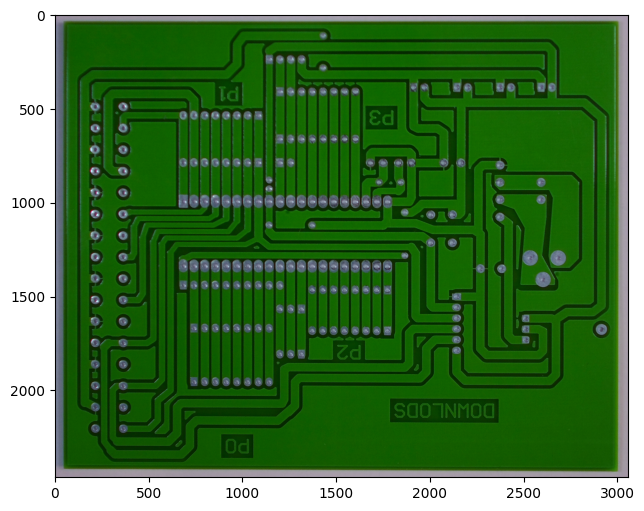

In [ ]:
# read template PCB 01 image
rgb_template_img = cv2.imread('/content/drive/MyDrive/PCB_DATASET/PCB_USED/04.JPG')

# display original template PCB image
plt.figure(figsize=(10,6))
plt.imshow(rgb_template_img, cmap="gray")

In [ ]:
rgb_template_img.shape

(2464, 3056, 3)

In [ ]:
a = int(rgb_template_img.shape[0]/4)
b = int(rgb_template_img.shape[1]/4)

In [ ]:
a,b

(616, 764)

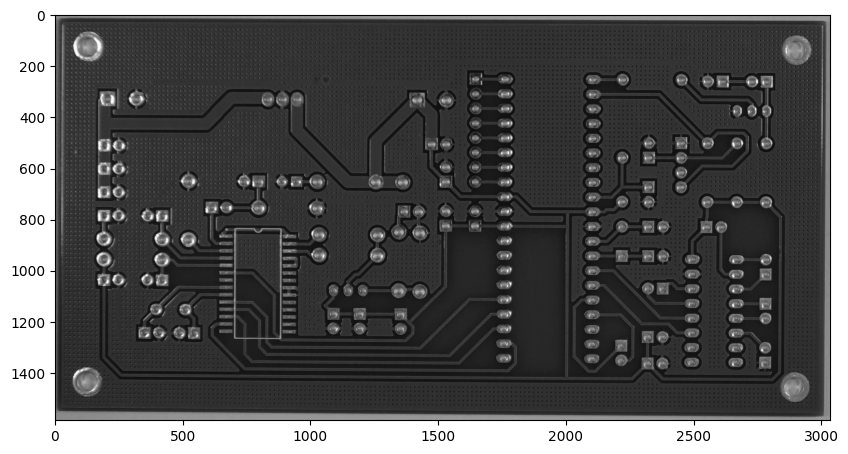

In [ ]:
# read template PCB 01 image as grayscale image
template_img = cv2.imread('/content/drive/MyDrive/PCB_DATASET/PCB_USED/01.JPG', 0)
# the 2nd parameter is flag, makes image grayscale for value 0 or 2

# display the grayscale template PCB image
plt.figure(figsize=(10,6))
plt.imshow(template_img, cmap="gray")

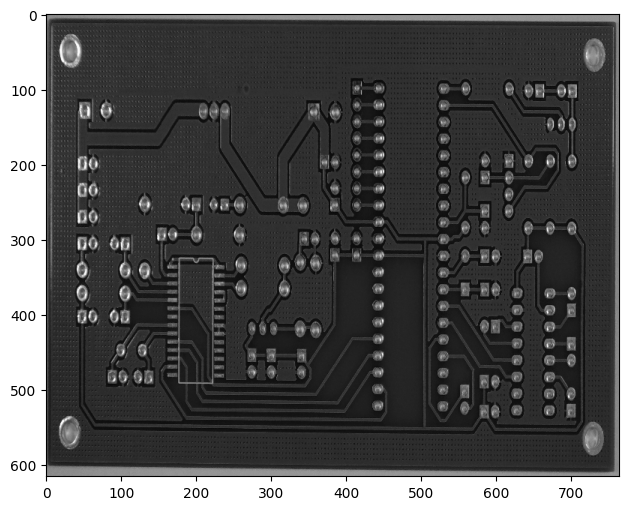

In [ ]:
# resize template image of PCB
template_img_resize = cv2.resize(template_img, (b,a))

# display the grayscale resized template PCB image
plt.figure(figsize=(10,6))
plt.imshow(template_img_resize, cmap="gray")

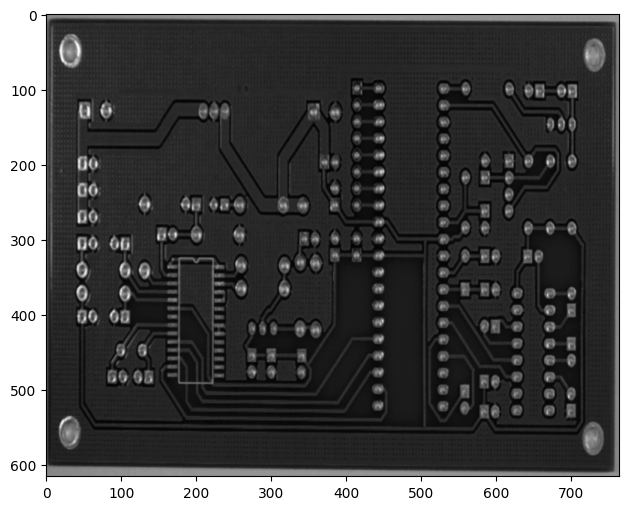

In [ ]:
# Gaussian blur to blur the image before thresholding
blur_template_img = cv2.GaussianBlur(template_img_resize, (3,3),0)

# display the blurred image
plt.figure(figsize=(10,6))
plt.imshow(blur_template_img, cmap="gray")

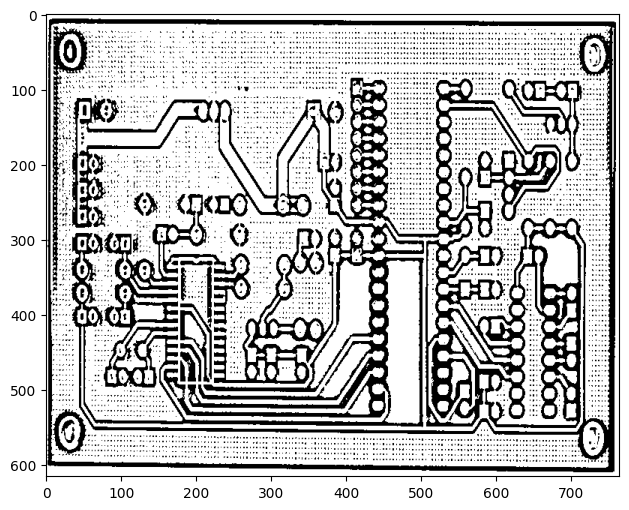

In [ ]:
template_adap_thresh = cv2.adaptiveThreshold(blur_template_img, 255,
                                         cv2. ADAPTIVE_THRESH_MEAN_C,
                                         cv2.THRESH_BINARY, 15, 5)

# display the thresholded image
plt.figure(figsize=(10,6))
plt.imshow(template_adap_thresh, cmap="gray")

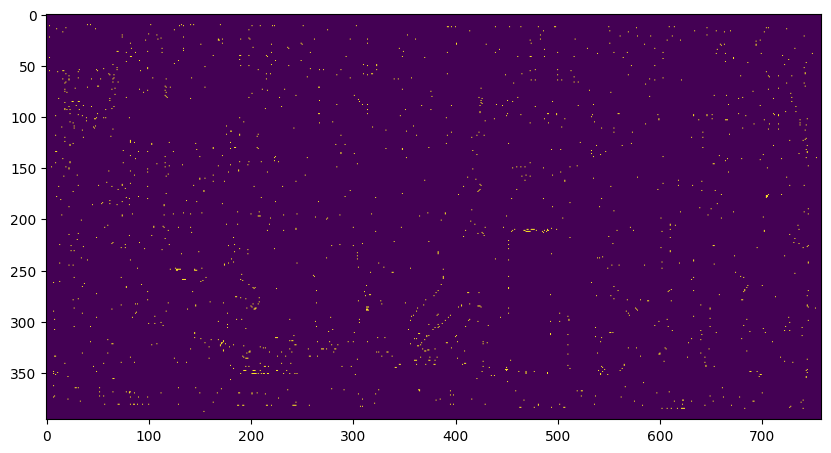

In [ ]:
# Image subtraction (template - test)

sub_img= cv2.subtract(template_adap_thresh,test_adap_thresh)

# display resultant image after subtraction
plt.figure(figsize=(10,6))
plt.imshow(sub_img)

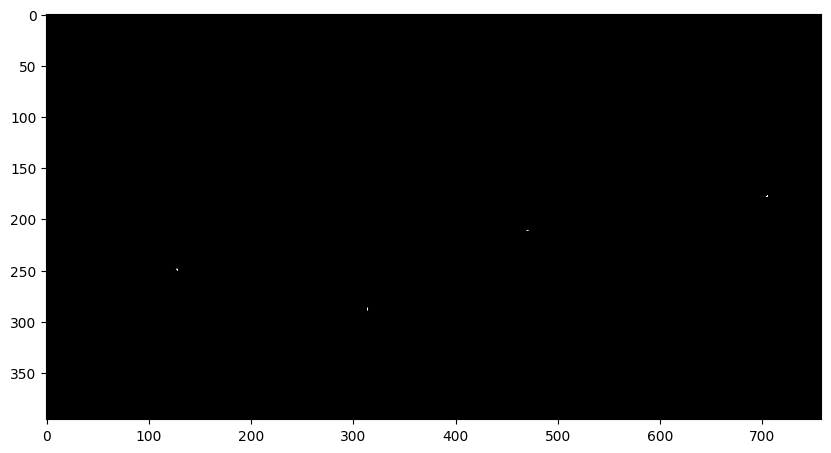

In [ ]:
# Median blur to eliminate background noise
final_img = cv2.medianBlur(sub_img, 3)

# display final binary image result
# to show defects in the image
plt.figure(figsize=(10,6))
plt.imshow(final_img, cmap="gray")

In [ ]:
orig = test_img_resize
mask_img = final_img

In [ ]:
# contour detection to get the count of defects
cnts = cv2.findContours(final_img, cv2.RETR_LIST,
                        cv2.CHAIN_APPROX_SIMPLE)[-2]
blobs = []
for cnt in cnts:
    if 0<cv2.contourArea(cnt)<300:
        blobs.append(cnt)

print("Number of defects in image:")
print(len(blobs))

Number of defects in image:
2


In [ ]:
os.makedirs(out_dir, exist_ok=True)

In [ ]:
_, thresh = cv2.threshold(mask_img, 127, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL,
cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
h_img, w_img = mask_img.shape[:2]

In [ ]:
patch_id = 0
for cnt in cnts:
    if 0<cv2.contourArea(cnt)<300: # CHANGE ***

      x, y, w, h = cv2.boundingRect(cnt) # bounding rect of defect region [web:8][web:28]

      # Center of defect
      cx = x + w // 2
      cy = y + h // 2

      # Fixed 20x20 box
      bw, bh = 64,64
      x0 = cx - bw // 2
      y0 = cy - bh // 2
      x1 = x0 + bw
      y1 = y0 + bh

      # Clip to image bounds
      x0 = max(0, x0)
      y0 = max(0, y0)
      x1 = min(w_img, x1)
      y1 = min(h_img, y1)
      print(x0,y0)
      # Crop from ORIGINAL image using same coords

      patch = orig[y0:y1, x0:x1]

      # Optional: ensure patch is 20x20 (skip if smaller at borders)
      if patch.shape[0] != bh or patch.shape[1] != bw:
        continue

      # Save patch
      out_path = os.path.join(out_dir, f"defect_{patch_id:04d}.png")
      cv2.imwrite(out_path, patch) # save ROI patch [web:21][web:28]
      patch_id += 1

573 172
625 86
519 44


FOR ALL THE DEFECTS USING FOR LOOP

In [ ]:
import os

# Define paths for input images, template images, and output directories
input_folder = "/content/drive/MyDrive/MY_PCB_FOLDERS/12_SHORT CIRCUIT"
final_output_folder = "/content/drive/MyDrive/PCB_DATASET/DEFECTS/SHORT CIRCUIT DEFECT"
template_path = "/content/drive/MyDrive/MY_PCB_FOLDERS/12_SHORT CIRCUIT/Copy of 12_short_01.jpg"
output_mask_folder = "/content/drive/MyDrive/PCB_DATASET/DEFECTS/SHORT CIRCUIT 0.5"

# Create output folders if they do not exist
os.makedirs(output_mask_folder, exist_ok=True)
os.makedirs(final_output_folder, exist_ok=True)

print("Paths defined and output folders checked/created.")

Paths defined and output folders checked/created.


In [ ]:
import os

# List contents of the final output folder
print(f"Contents of {final_output_folder}:")
files_in_output = os.listdir(final_output_folder)
if files_in_output:
    for f in files_in_output:
        print(f)
else:
    print("Folder is empty.")

Contents of /content/drive/MyDrive/PCB_DATASET/DEFECTS/SHORT CIRCUIT DEFECT:
01_short_15_defect_0000.png
01_short_12_defect_0001.png
01_short_17_defect_0002.png
01_short_10_defect_0003.png
01_short_14_defect_0004.png
01_short_14_defect_0005.png
01_short_18_defect_0006.png
01_short_06_defect_0007.png
01_short_04_defect_0008.png
01_short_04_defect_0009.png
01_short_03_defect_0010.png
01_short_07_defect_0011.png
Copy of 04_short_03_defect_0000.png
Copy of 04_short_03_defect_0001.png
Copy of 04_short_09_defect_0002.png
Copy of 04_short_07_defect_0003.png
Copy of 04_short_02_defect_0004.png
Copy of 04_short_02_defect_0005.png
Copy of 04_short_08_defect_0006.png
Copy of 04_short_05_defect_0007.png
Copy of 04_short_17_defect_0008.png
Copy of 04_short_17_defect_0009.png
Copy of 04_short_14_defect_0010.png
Copy of 04_short_19_defect_0011.png
Copy of 04_short_19_defect_0012.png
Copy of 04_short_15_defect_0013.png
Copy of 04_short_15_defect_0014.png
Copy of 04_short_15_defect_0015.png
Copy of 04_

In [ ]:
import cv2

# Load the template image in grayscale
template = cv2.imread(template_path, 0)

# Resize the template image to 500x500 pixels
template = cv2.resize(template, (500, 500))

print("Template image loaded, converted to grayscale, and resized.")

Template image loaded, converted to grayscale, and resized.


In [ ]:
import cv2
import os

# Loop through each file in the input_folder
for filename in os.listdir(input_folder):
    if filename.endswith(".jpg") or filename.endswith(".png"):

        img_path = os.path.join(input_folder, filename)
        print(f"Processing: {filename}")

        # Read the image in grayscale
        img = cv2.imread(img_path, 0)

        # Resize the image to 500x500 pixels
        img = cv2.resize(img, (500, 500))

        # Calculate the absolute difference between the template and the current image
        diff = cv2.absdiff(template, img)

        # Apply Gaussian blur
        blur = cv2.GaussianBlur(diff, (5, 5), 0)

        # Apply Otsu thresholding
        _, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        # Create a 3x3 rectangular kernel
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

        # Perform morphological closing
        mask = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

        # Construct the output path for the mask and save it
        mask_output_path = os.path.join(output_mask_folder, "mask_" + filename)
        cv2.imwrite(mask_output_path, mask)

print("Defect masks generated and saved.")

Processing: Copy of 12_short_09.jpg
Processing: Copy of 12_short_04.jpg
Processing: Copy of 12_short_02.jpg
Processing: Copy of 12_short_08.jpg
Processing: Copy of 12_short_07.jpg
Processing: Copy of 12_short_01.jpg
Processing: Copy of 12_short_06.jpg
Processing: Copy of 12_short_10.jpg
Processing: Copy of 12_short_05.jpg
Processing: Copy of 12_short_03.jpg
Defect masks generated and saved.


In [ ]:
import cv2
import os

# Initialize a global counter for defects
global_id = 0

print("\n📦 Creating 64x64 defect crops...\n")

# Loop through each mask file in the output_mask_folder
for filename in os.listdir(output_mask_folder):
    if filename.endswith(".jpg") or filename.endswith(".png"):

        mask_img_path = os.path.join(output_mask_folder, filename)
        mask_img = cv2.imread(mask_img_path, 0)   # Read mask directly as grayscale

        if mask_img is None:
            print("⚠ Mask not found for:", filename)
            continue

        # Ensure mask is binary (though Otsu already makes it so, this is a safety step)
        _, binary = cv2.threshold(mask_img, 50, 255, cv2.THRESH_BINARY)

        # Find contours (defect regions) on the binary mask
        contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        print(f"Processing mask {filename} -> contours found: {len(contours)}")

        # Get the original image corresponding to the mask for cropping
        # Remove "mask_" prefix to get original filename
        original_filename = filename.replace("mask_", "")
        original_img_path = os.path.join(input_folder, original_filename)
        original_img = cv2.imread(original_img_path)

        if original_img is None:
            print("⚠ Original image not found for:", original_img_path)
            continue

        # Resize original image to match template/mask size for consistent cropping
        original_img = cv2.resize(original_img, (500, 500))

        for cnt in contours:
            x, y, w, h = cv2.boundingRect(cnt)

            # Filter out very small contours that might be noise (adjust as needed)
            if w < 5 or h < 5: # Increased minimum size to reduce noise artifacts
                continue

            # Calculate center of the defect region
            cx = x + w // 2
            cy = y + h // 2

            # Define a 64x64 patch centered around the defect
            half_size = 32  # 64 / 2

            x1 = max(cx - half_size, 0)
            y1 = max(cy - half_size, 0)
            x2 = min(cx + half_size, original_img.shape[1])
            y2 = min(cy + half_size, original_img.shape[0])

            # Crop the patch from the ORIGINAL image
            patch = original_img[y1:y2, x1:x2]

            # If for some reason the patch is empty, skip it
            if patch.size == 0:
                continue

            # Ensure the patch is exactly 64x64 (resize if clipping made it smaller)
            if patch.shape[0] != 64 or patch.shape[1] != 64:
                patch = cv2.resize(patch, (64, 64)) # Force resize to 64x64

            # Optional: Skip patches that are almost entirely black (mean intensity low)
            # This can filter out very dark regions that aren't true defects
            if patch.mean() < 10: # Threshold can be adjusted
                continue

            # Create a unique name for the output patch
            # Format: originalFilename_defect_globalID.png
            base_name_no_ext = os.path.splitext(original_filename)[0]
            out_name = f"{base_name_no_ext}_defect_{global_id:04d}.png"

            # Save the 64x64 defect patch
            out_path = os.path.join(final_output_folder, out_name)
            print(f"Attempting to save: {out_path}") # Debugging line
            cv2.imwrite(out_path, patch)
            global_id += 1   # Increment global defect counter

print("\n🎉 All Done!")
print("➡ 64x64 Defect Crops Folder:", final_output_folder)



📦 Creating 64x64 defect crops...

Processing mask mask_01_short_11.jpg -> contours found: 7
⚠ Original image not found for: /content/drive/MyDrive/MY_PCB_FOLDERS/12_SHORT CIRCUIT/01_short_11.jpg
Processing mask mask_01_short_19.jpg -> contours found: 7
⚠ Original image not found for: /content/drive/MyDrive/MY_PCB_FOLDERS/12_SHORT CIRCUIT/01_short_19.jpg
Processing mask mask_01_short_13.jpg -> contours found: 7
⚠ Original image not found for: /content/drive/MyDrive/MY_PCB_FOLDERS/12_SHORT CIRCUIT/01_short_13.jpg
Processing mask mask_01_short_15.jpg -> contours found: 7
⚠ Original image not found for: /content/drive/MyDrive/MY_PCB_FOLDERS/12_SHORT CIRCUIT/01_short_15.jpg
Processing mask mask_01_short_12.jpg -> contours found: 7
⚠ Original image not found for: /content/drive/MyDrive/MY_PCB_FOLDERS/12_SHORT CIRCUIT/01_short_12.jpg
Processing mask mask_01_short_17.jpg -> contours found: 6
⚠ Original image not found for: /content/drive/MyDrive/MY_PCB_FOLDERS/12_SHORT CIRCUIT/01_short_17.jpg